# Section 29: Decision Trees

- online-ds-pt-041320
- 09/11/20


## Learning Objectives

- Data Partitioning Activity
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- Activity: Decision Trees to Predict Repeat Offender Criminals 
<!--- - [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)--->

## ANNOUNCEMENTS

## Questions/Comments?:

# Introduction to Decision Trees

## Activity: Data Partitioning

In [1]:
# !pip install -U fsds
from fsds.imports import *
import warnings
warnings.filterwarnings('ignore')

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
from sklearn.datasets import make_blobs
np.random.seed(27)
plt.style.use(['seaborn-talk','seaborn'])
plt.rcParams['grid.alpha'] = 0.2

In [3]:
def helper_create_plot(n=300):
    '''
    Create a plot to practice how a decision tree makes its cuts/decisions.
    '''
    X = []
    y = []

    for i in range(n):
        # Generate a random number
        nx = np.random.random()*10
        ny = np.random.random()*10
        X.append((nx,ny))

        if nx > 5:
            if ny > 1:
                y.append(0)
            else:
                y.append(1)
        else:
            if ny > 7:
                y.append(0)
            else:
                y.append(1)

    X = np.array(X)

    f, ax = plt.subplots(1)

    ax.scatter(X[:,0], X[:,1], c=y, s=20, cmap='Set1');
    plt.xticks(range(11));
    plt.xlabel('X1');
    plt.yticks(range(11));
    plt.ylabel('X2');
    
    return f, ax

def create_line(ax, direction, threshold, x_range=(0,10), y_range=(0,10), color='blue'):
    '''
    Creates a vertical or horizontal cut at threshold
    '''
    if direction == 'vertical':
        cut = lambda t: ax.vlines(t,y_range[0], y_range[1], colors=color)
    elif direction == 'horizontal':
        cut = lambda t: ax.hlines(t,x_range[0], x_range[1], colors=color)
    else:
        print('Direction does not exist')
        return
    
    cut(threshold)
    

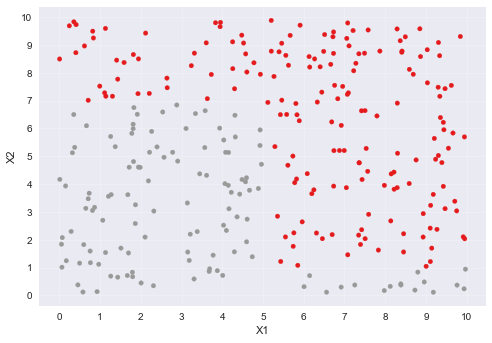

In [4]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [5]:
# 'horizontal' or 'vertical'
q1_direction = 'vertical'
# Between 0 and 10
q1_threshold = 5

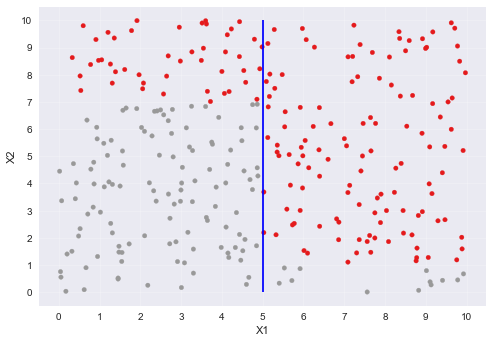

In [6]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

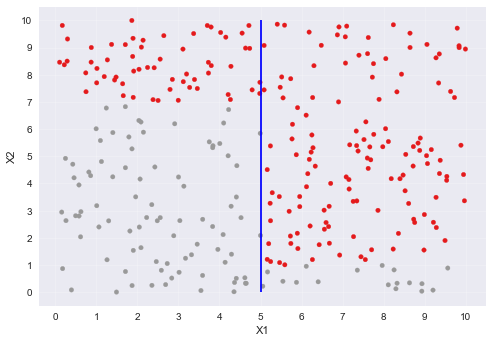

In [7]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [8]:
# 'horizontal' or 'vertical'
q2_direction = 'horizontal'
# Between 0 and 10
q2_threshold = 7


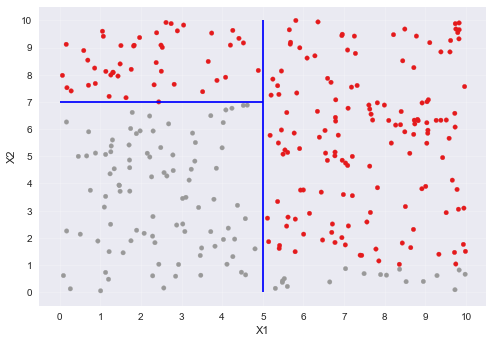

In [9]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

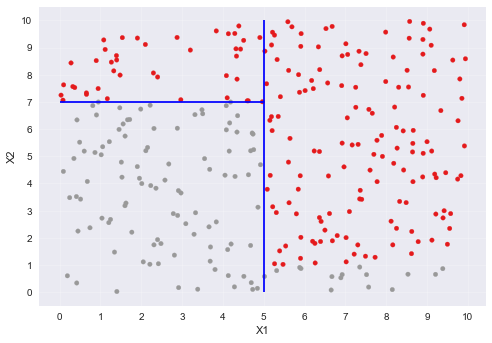

In [10]:
q2_direction = 'horizontal'
q2_threshold = 7

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [11]:
# 'horizontal' or 'vertical'
q3_direction = 'horizontal'
# Between 0 and 10
q3_threshold = 1

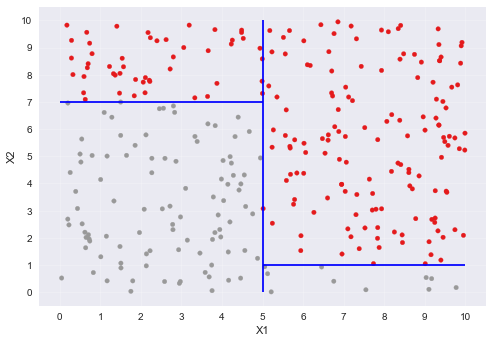

In [12]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

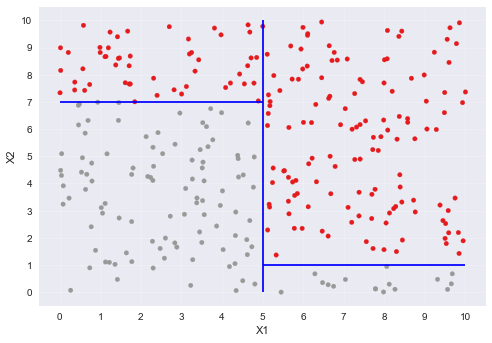

In [13]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/ex-decision-tree.png" width=70%>




## Decision Trees Overview

- **DECISION TREES:**
    - Supervised Learning
    - Classification OR Regression
    - **[Interactive Visual Demonstration](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)**


- **ADVANTAGES**
    - Interpretability 
    - Render feature importance
    - Less data pre-processing needed
    
    
- **DISADVANTAGES**
    - "Greedy search" -  short sighted optimization
    - Do not predict a continuous output (for regression)
    - Does not predict beyond range of the training data
    - Overfits SUPER easily

<!---<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>--->


## Direction Acyclic Graphs (DAG) Definition


- **Direction Acyclic Graph**
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src='https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-decision-trees-online-ds-pt-100719/master/images/dt1.png' width=60%>

# Entropy and Information Gain

## Entropy and decision trees


> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>

## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__
> 
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$

When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. 

## Information Gain


> __Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 


$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$


$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 


# Decision Tree Process

1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'entropy'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.
    - Number of data points in a final partition
    - Layers deep
    
5. Test the trees decisions using previously unseen data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=65%>

# Implementation with sklearn

In [14]:
url="https://raw.githubusercontent.com/jirvingphd/dsc-decision-trees-with-sklearn-codealong-online-ds-pt-100719/master/tennis.csv"
df = pd.read_csv(url)
df['windy'] = df['windy'].astype(int)
df['play'] = df['play'].map({'no':0,'yes':1})
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1


In [15]:
y = df['play'].copy()
X =  df.drop(columns=['play']).copy()
X

,outlook,temp,humidity,windy
0,sunny,hot,high,0
1,sunny,hot,high,1
2,overcast,hot,high,0
3,rainy,mild,high,0
4,rainy,cool,normal,0
5,rainy,cool,normal,1
6,overcast,cool,normal,1
7,sunny,mild,high,0
8,sunny,cool,normal,0
9,rainy,mild,normal,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(X_train)

def remake_df(X_split, X_df,encoder):
    return pd.DataFrame(X_split, columns=encoder.get_feature_names(X_df.columns), index=X_df.index)

X_train_ohe = encoder.transform(X_train)
X_test_ohe = encoder.transform(X_test)


X_train_ohe = remake_df(X_train_ohe,X_train,encoder)
X_test_ohe = remake_df(X_test_ohe,X_test,encoder)

X_test_ohe

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_0,windy_1
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
11,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



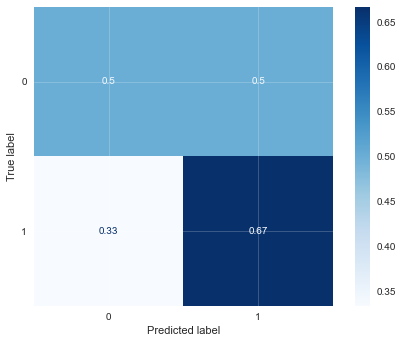

In [19]:
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe,y_train)
y_hat_test = clf.predict(X_test_ohe)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(clf,X_test_ohe,y_test,cmap='Blues',
                              normalize='true')


In [20]:
metrics.accuracy_score(y_test,y_hat_test)

0.6

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

> NOTE ON INSTALLING GRAPHVIZ:
- On windows you must [download the Graphviz installer](https://www.graphviz.org/download/)(Choose the "stable" release), install it, and then add the `bin` folder inside of it to your system's Path.
- [To Edit your path on MaC](https://www.architectryan.com/2012/10/02/add-to-the-path-on-mac-os-x-mountain-lion/)

- [TO Edit Your Path on Windows (10)](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/)

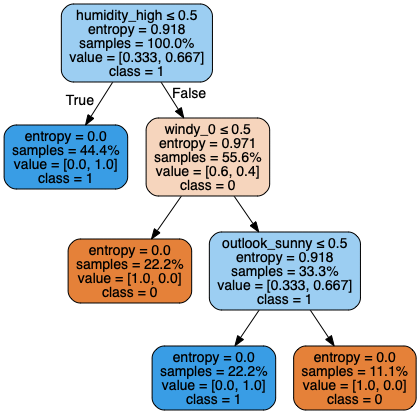

In [21]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_train_ohe.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True,proportion=True,
                           special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [22]:
def viz_tree(clf,X_train_ohe,y):
    # Create DOT data
    dot_data = export_graphviz(clf, out_file=None, 
                               feature_names=X_train_ohe.columns,  
                               class_names=np.unique(y).astype('str'), 
                               filled=True, rounded=True,proportion=True,
                               special_characters=True)

    # Draw graph
    graph = graph_from_dot_data(dot_data)  

    # Show graph
    return Image(graph.create_png())

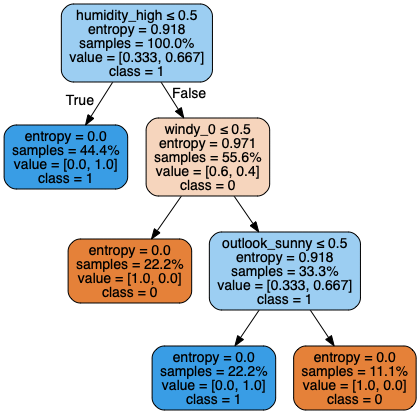

In [23]:
viz_tree(clf,X_train_ohe,y)

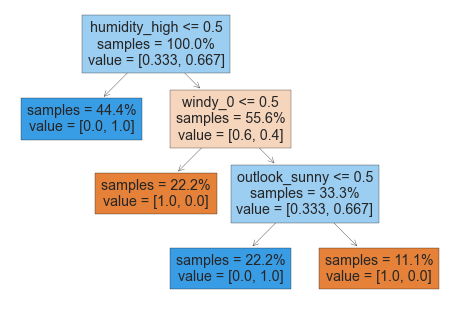

In [24]:
## Built in Implementation
from sklearn.tree import plot_tree

plot_tree(clf,feature_names=X_train_ohe.columns,filled=True,
          impurity=False,proportion=True);

# Activity: Iowa Prisoners

In [25]:
# # prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"
df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [26]:
## Drop unwanted cols
df= df.drop(columns=['yr_released','report_year'])

### Preprocessing Data

- Null values (fill or drop)
- Data Types (finding categorical variables)
- Inspect the value_counts/labels of categoricals
- Scaling or lack-off
- Encode Them
    - Label Encoding
    - One hot encoding


race_ethnicity      30
age_released         3
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
dtype: int64

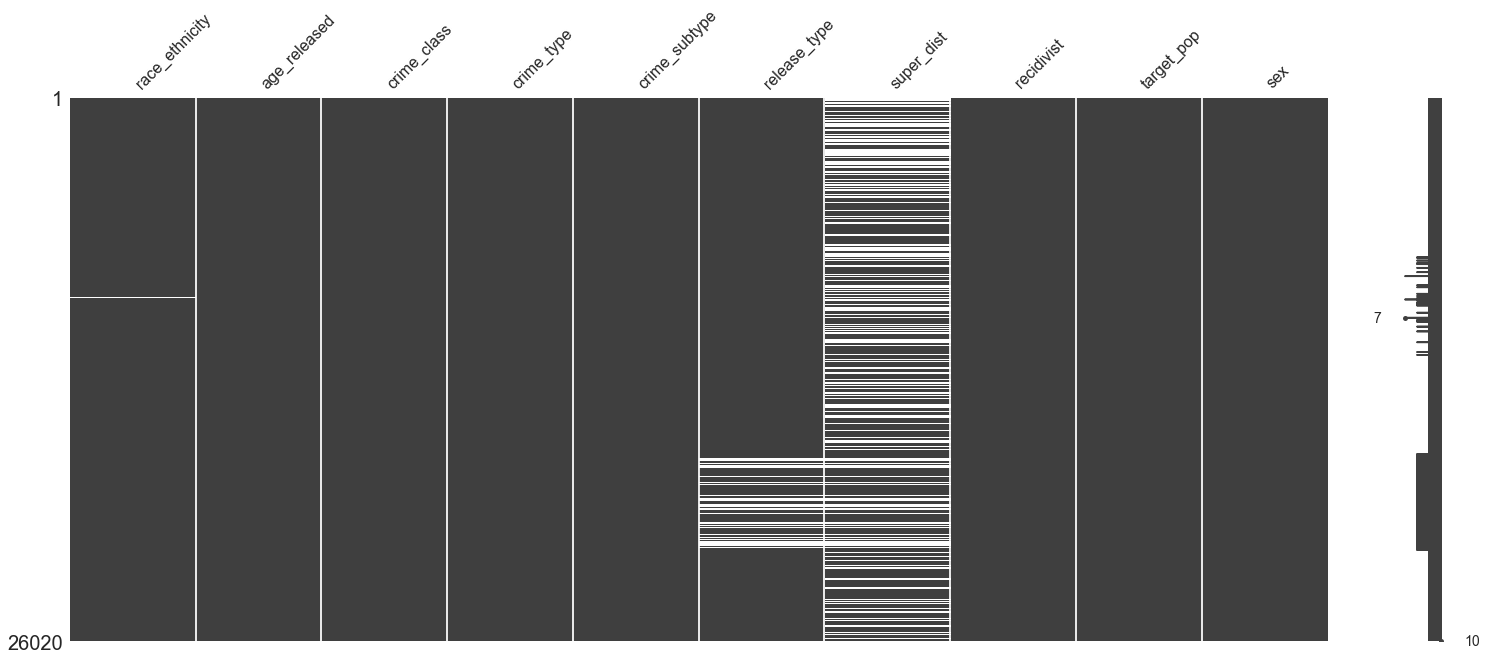

In [27]:
## Check null values
import missingno
missingno.matrix(df)
df.isna().sum()

In [28]:
df.dtypes

race_ethnicity    object
age_released      object
crime_class       object
crime_type        object
crime_subtype     object
release_type      object
super_dist        object
recidivist        object
target_pop        object
sex               object
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


In [30]:
df['race_ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
NaN                                                   30
American Indian or Alaska Native - Hispanic           20
White -                                               12
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [31]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {
    'White - Non-Hispanic':'White',
    'Black - Non-Hispanic': 'Black',
    'White - Hispanic' : 'Hispanic',
    'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
    'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
    'Black - Hispanic' : 'Black',
    'American Indian or Alaska Native - Hispanic':'American Native',
    'White -' : 'White',
    'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
    'N/A -' : np.nan,
    'Black -':'Black'
}

df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
df['race_ethnicity'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                             35
Name: race_ethnicity, dtype: int64

In [32]:
df['crime_class'].value_counts()

D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Sexual Predator Community Supervision           2
Other Felony (Old Code)                         2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

In [33]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)
df['crime_class'].value_counts(dropna=False)

D Felony                  10487
C Felony                   6803
Aggravated Misdemeanor     4930
B Felony                   1765
Felony - Enhanced          1753
Serious Misdemeanor         155
Sex Offender                100
NaN                          20
A Felony                      4
Simple Misdemeanor            3
Name: crime_class, dtype: int64

In [34]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [35]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))
age_map

{'Under 25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55 and Older': 4}

In [36]:
df['age_enc'] = df['age_released'].map(age_map)
df['age_enc'].value_counts()

1.0    9554
2.0    6223
0.0    4590
3.0    4347
4.0    1303
Name: age_enc, dtype: int64

In [37]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,70) 
age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 70}

In [38]:
df['age_number'] = df['age_released'].map(age_num_map)
df['age_number'].value_counts()

30.0    9554
40.0    6223
20.0    4590
50.0    4347
70.0    1303
Name: age_number, dtype: int64

In [39]:
df.drop(columns='age_released',inplace=True)

In [40]:
# ## Drop Nulls 
# df.isna().sum().divide(len(df))*100
# drop_cols  = [col for col in df.drop(columns=['super_dist','release_type']).columns]
# drop_cols

In [41]:
#  df.dropna(subset=drop_cols, inplace=True)

In [42]:
# df.isna().sum()
# df[['super_dist','release_type']] = df[['super_dist','release_type']].fillna('Missing')
# df.isna().sum()

In [43]:
df.dtypes

race_ethnicity     object
crime_class        object
crime_type         object
crime_subtype      object
release_type       object
super_dist         object
recidivist         object
target_pop         object
sex                object
age_enc           float64
age_number        float64
dtype: object

In [44]:
y = df['recidivist']
X = df.drop(columns='recidivist')

In [45]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y,test_size=.3,stratify=y)

In [46]:
X_train

,race_ethnicity,crime_class,crime_type,crime_subtype,release_type,super_dist,target_pop,sex,age_enc,age_number
5209,White,D Felony,Violent,Sex,Discharged – End of Sentence,NaN,No,Male,3.0,50.0
11487,White,D Felony,Public Order,OWI,Parole,1JD,Yes,Male,1.0,30.0
24979,Hispanic,C Felony,Drug,Trafficking,Parole Granted,7JD,No,Male,2.0,40.0
16236,White,D Felony,Drug,Trafficking,Parole Granted,8JD,Yes,Male,2.0,40.0
18775,White,D Felony,Property,Forgery/Fraud,Parole,1JD,No,Male,3.0,50.0
...,...,...,...,...,...,...,...,...,...,...
9310,White,Aggravated Misdemeanor,Violent,Assault,Discharged – End of Sentence,NaN,No,Male,1.0,30.0
19865,White,D Felony,Other,Other Criminal,NaN,NaN,No,Male,1.0,30.0
2603,White,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,No,Male,1.0,30.0
6705,Hispanic,D Felony,Public Order,OWI,Parole,5JD,Yes,Male,1.0,30.0


In [47]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

In [48]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('O').columns

In [49]:
num_cols

Index(['age_enc', 'age_number'], dtype='object')

In [50]:
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))])#,
#     ('scale',StandardScaler())])

In [51]:
## Create a cat_transformer pipeline 
## that will impute using median and then calculate z-scores
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [52]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessing=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['age_enc', 'age_number'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['race_ethnicity', 'crime_class', 'crime_type', 'crime_subtype',
       'release_type', 'super_dist', 'target_pop', 'sex'],
      dtype='object'))])

In [53]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [54]:
feature_names = preprocessing.named_transformers_['cat']\
                .named_steps['encoder'].get_feature_names(cat_cols)
feature_names[:5]

array(['race_ethnicity_American Native',
       'race_ethnicity_Asian or Pacific Islander', 'race_ethnicity_Black',
       'race_ethnicity_Hispanic', 'race_ethnicity_White'], dtype=object)

In [55]:
X_train_tf

array([[ 3., 50.,  0., ...,  0.,  1.,  0.],
       [ 1., 30.,  0., ...,  0.,  1.,  0.],
       [ 2., 40.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 1., 30.,  0., ...,  0.,  1.,  0.],
       [ 1., 30.,  0., ...,  0.,  1.,  0.],
       [ 4., 70.,  0., ...,  0.,  1.,  0.]])

In [56]:
X_train_ohe = pd.DataFrame(X_train_tf, columns=[*num_cols,*feature_names])
X_train_ohe

,age_enc,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,race_ethnicity_missing,crime_class_A Felony,crime_class_Aggravated Misdemeanor,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,3.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,3.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18209,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18210,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18211,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18212,1.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
X_test_ohe = pd.DataFrame(X_test_tf, columns=[*num_cols,*feature_names])
X_test_ohe

,age_enc,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,race_ethnicity_missing,crime_class_A Felony,crime_class_Aggravated Misdemeanor,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,3.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,1.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7802,2.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7803,1.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7804,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## Defining the Problem & Fitting a Decision Tree

Now, import the necessary packages and fit a decision tree to predict whether or not a mushroom is poisonous (this is stored under the 'class' feature as 'e' for edible, or 'p' for poisonous.

## Vanilla DecisionTree (baseline)

In [58]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()#max_depth=5)

tree.fit(X_train_ohe,y_train)

### Functions from Prior Classes

In [61]:
def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label=''):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f" {label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    return report #fig,axes

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.70      0.79      0.74      5202
         Yes       0.44      0.33      0.38      2604

    accuracy                           0.64      7806
   macro avg       0.57      0.56      0.56      7806
weighted avg       0.61      0.64      0.62      7806

------------------------------------------------------------




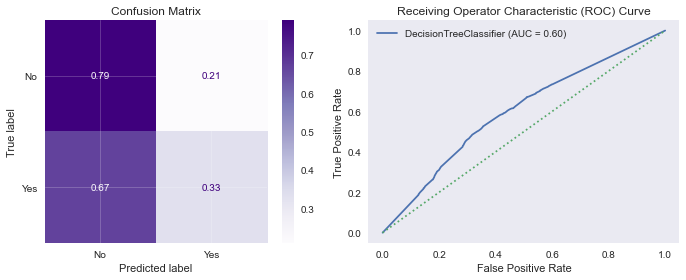

In [62]:
evaluate_classification(tree,X_test_ohe,y_test);

In [63]:
def get_importances(tree):
    df_import = pd.Series(tree.feature_importances_, 
                      index = X_train_ohe.columns,name='Importance')
    return df_import.sort_values()

<AxesSubplot:>

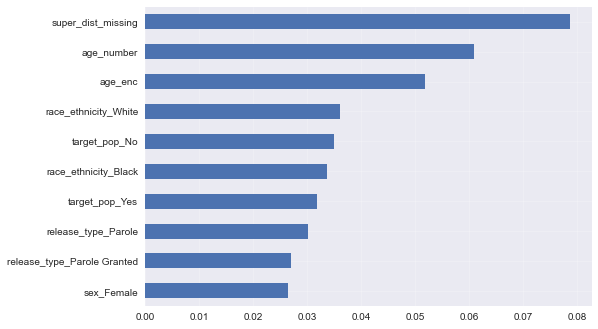

In [64]:
importance = get_importances(tree)
importance.tail(10).plot(kind='barh')

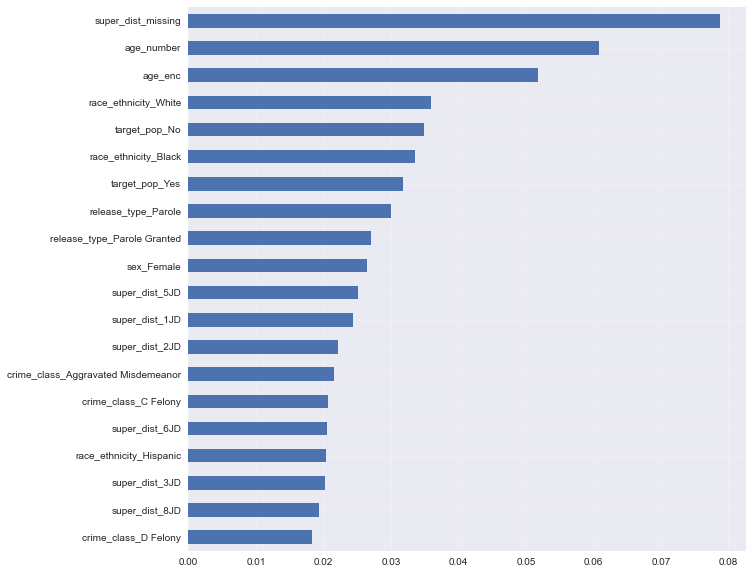

In [65]:
def plot_importance(tree, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train_ohe.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
plot_importance(tree);

## You can also visualize your Decision Trees

> Note: This requires installing graphviz which can be a painful installation.

In [92]:
export_graphviz_kws={}#'out_file':'tree.png'}

from sklearn.tree import export_graphviz
from IPython.display import SVG
import graphviz #import Source
from IPython.display import display

class_names=['Non_Recid','Yes_Recid']
# if feature_names is None:
feature_names=X_train.columns


tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
tree_viz_kws.update(export_graphviz_kws)



tree_data = export_graphviz(tree,max_depth=20,feature_names=X_train_ohe.columns, 
                               class_names=class_names,**tree_viz_kws)
# tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
graph = graphviz.Source(tree_data,format='png')
graph.render("tree_iowa")
print('Complete')
# display(graph)
# display(SVG(graph.pipe(format='svg')))

Complete


In [100]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,show=True,
                   class_names=['0','1'],format_='png',
                   kws={},save_filename=None,max_depth=20):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,max_depth=max_depth,
                              **tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)

    if show:
        display(graph)


#     display(SVG(graph.pipe(format=format_)))#'svg')))

In [ ]:
visualize_tree(tree,feature_names=X_train_ohe.columns, save_filename='tree_example')

## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [94]:
## Check class
y_train.value_counts(normalize=True)

No     0.666356
Yes    0.333644
Name: recidivist, dtype: float64

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train_ohe, y_train)

In [96]:
pd.Series(y_train_res).value_counts()

Yes    12137
No     12137
Name: recidivist, dtype: int64

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.71      0.72      0.72      5202
         Yes       0.43      0.42      0.43      2604

    accuracy                           0.62      7806
   macro avg       0.57      0.57      0.57      7806
weighted avg       0.62      0.62      0.62      7806

------------------------------------------------------------




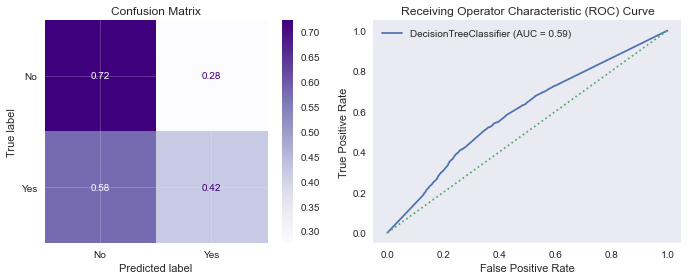

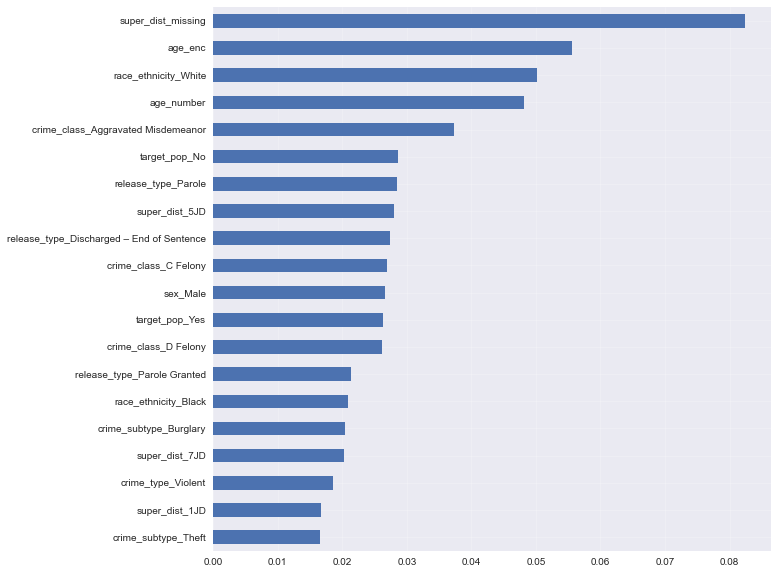

In [97]:
tree = DecisionTreeClassifier()#max_depth=5)

tree.fit(X_train_res,y_train_res)
evaluate_classification(tree, X_test_ohe,y_test)
plot_importance(tree);

In [99]:
visualize_tree(tree,show=False,feature_names=X_train_ohe.columns,save_filename='big_tree.png')

# FOR NEXT CLASS:

## GridSearchCV with DecisionTreeClassifier

### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

In [ ]:
class Timer():
    def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
        import tzlocal
        import datetime as dt
        
        self.tz = tzlocal.get_localzone()
        self.fmt= time_fmt
        self._created = dt.datetime.now(tz=self.tz)
        
        if start:
            self.start()
            
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self.tz)

        
    def start(self,verbose=True):
        self._laps_completed = 0
        self.start = self.get_time()
        if verbose: 
            print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
    def stop(self, verbose=True):
        self._laps_completed += 1
        self.end = self.get_time()
        self.elapsed = self.end -  self.start
        if verbose: 
            print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
            print(f'  - Total Time: {self.elapsed}')

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
## Set up param grid


## Instantiate classifier


## Instantiate GridSearchCV

## Start timer and fit search


## Stop time and print best params


In [ ]:
## Create a tree with the gridsearch's best params


## Get predictions for train and test


## Print classification report for train and test

# print(metrics.confusion_matrix(y_test,y_hat_test))

## Evaluate Model using function

In [ ]:
# visualize_tree(tree)
